<a href="https://colab.research.google.com/github/szeshiang/Deep-Learning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [134]:
albums=pd.read_csv('rolling_stones_spotify.csv')
albums.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC    10/6/2022   
1           1   Street Fighting Man - Live  Licked Live In NYC    10/6/2022   
2           2           Start Me Up - Live  Licked Live In NYC    10/6/2022   
3           3  If You Can't Rock Me - Live  Licked Live In NYC    10/6/2022   
4           4            Don’t Stop - Live  Licked Live In NYC    10/6/2022   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  duration_ms  popularity  
0       0.1100  118.001   0.0302        48640          33  
1       0.0759  131.455   0.3180       253173          34  
2       0.1150  130.066   0.3130       263160          34  
3       0.1930  132.994   0.1470       305880          32  
4       0.0930  130.533   0.2060       305106          32

In [135]:
albums.shape

(1610, 18)

In [136]:
albums.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'duration_ms', 'popularity'],
      dtype='object')

In [159]:
albums.columns = ['Unnamed', 'name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']

In [160]:
albums

Unnamed                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC    10/6/2022   
1           1   Street Fighting Man - Live  Licked Live In NYC    10/6/2022   
2           2           Start Me Up - Live  Licked Live In NYC    10/6/2022   
3           3  If You Can't Rock Me - Live  Licked Live In NYC    10/6/2022   
4           4            Don’t Stop - Live  Licked Live In NYC    10/6/2022   
...       ...                          ...                 ...          ...   
1605     1605                        Carol  The Rolling Stones    16/4/1964   
1606     1606                      Tell Me  The Rolling Stones    16/4/1964   
1607     1607          Can I Get A Witness  The Rolling Stones    16/4/1964   
1608     1608   You Can Make It If You Try  The Rolling Stones    16/4/1964   
1609     1609              Walking The Dog  The Rolling Stones    16/4/1964   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  duration_ms  popularity  
0      0.0302        48640          33  
1      0.3180       253173          34  
2      0.3130       263160          34  
3      0.1470       305880          32  
4      0.2060       305106          32  
...       ...          ...         ...  
1605   0.9670       154080          39  
1606   0.4460       245266          36  
1607   0.8350       176080          30  
1608   0.5320       121680          27  
1609   0.9690       189186          35  

[1610 rows x 18 columns]

In [161]:
#Print Information about data
albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed           1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  duration_ms       1610 non-null   int64  


In [162]:
albums.isnull().sum()

Unnamed             0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
popularity          0
dtype: int64

In [163]:
albums.describe()

Unnamed  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence    duration_ms   popularity  
count  1610.000000    1610.000000  1610.000000  
mean      0.582165  257736.488199    20.788199  
std       0.231253  108333.474920    12.426859  
min       0.000000   21000.000000     0.000000  
25%       0.404250  190613.000000    13.000000  
50%       0.583000  243093.000000    20.000000  
75%       0.778000  295319.750000    27.000000  
max       0.974000  981866.000000    80.000000

In [164]:
new_albums=albums[['Unnamed', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']]
new_albums

Unnamed  track_number  acousticness  danceability  energy  \
0           0             1        0.0824         0.463   0.993   
1           1             2        0.4370         0.326   0.965   
2           2             3        0.4160         0.386   0.969   
3           3             4        0.5670         0.369   0.985   
4           4             5        0.4000         0.303   0.969   
...       ...           ...           ...           ...     ...   
1605     1605             8        0.1570         0.466   0.932   
1606     1606             9        0.0576         0.509   0.706   
1607     1607            10        0.3710         0.790   0.774   
1608     1608            11        0.2170         0.700   0.546   
1609     1609            12        0.3830         0.727   0.934   

      instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0             0.996000    0.9320   -12.913       0.1100  118.001   0.0302   
1             0.233000    0.9610    -4.803       0.0759  131.455   0.3180   
2             0.400000    0.9560    -4.936       0.1150  130.066   0.3130   
3             0.000107    0.8950    -5.535       0.1930  132.994   0.1470   
4             0.055900    0.9660    -5.098       0.0930  130.533   0.2060   
...                ...       ...       ...          ...      ...      ...   
1605          0.006170    0.3240    -9.214       0.0429  177.340   0.9670   
1606          0.000002    0.5160    -9.427       0.0843  122.015   0.4460   
1607          0.000000    0.0669    -7.961       0.0720   97.035   0.8350   
1608          0.000070    0.1660    -9.567       0.0622  102.634   0.5320   
1609          0.068500    0.0965    -8.373       0.0359  125.275   0.9690   

      duration_ms  popularity  
0           48640          33  
1          253173          34  
2          263160          34  
3          305880          32  
4          305106          32  
...           ...         ...  
1605       154080          39  
1606       245266          36  
1607       176080          30  
1608       121680          27  
1609       189186          35  

[1610 rows x 13 columns]

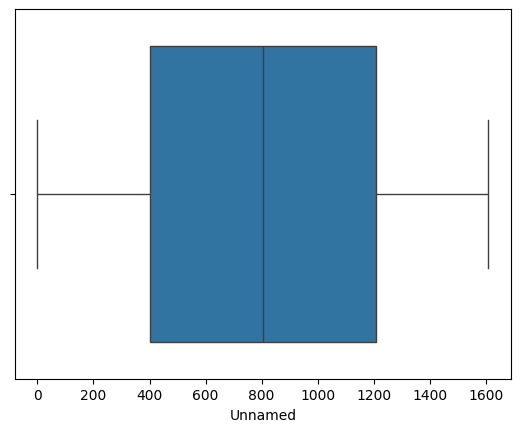

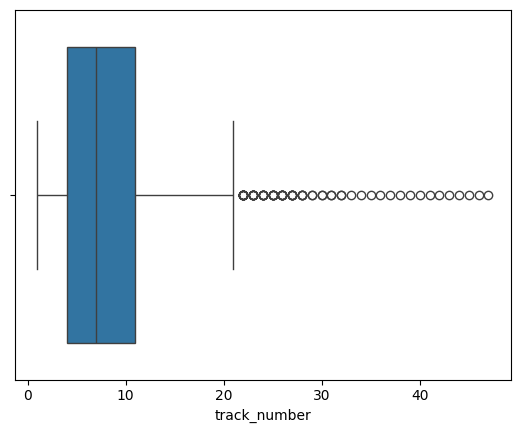

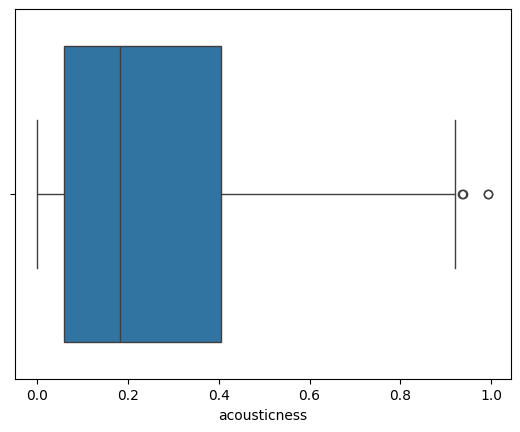

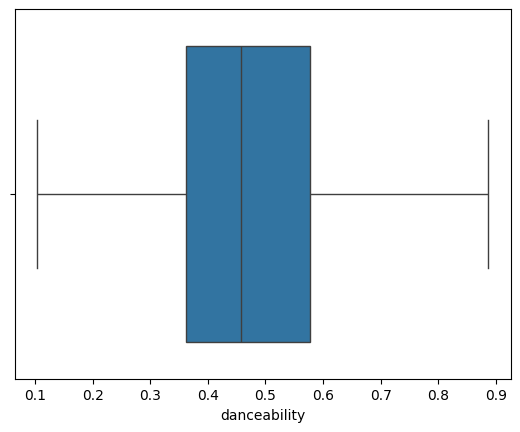

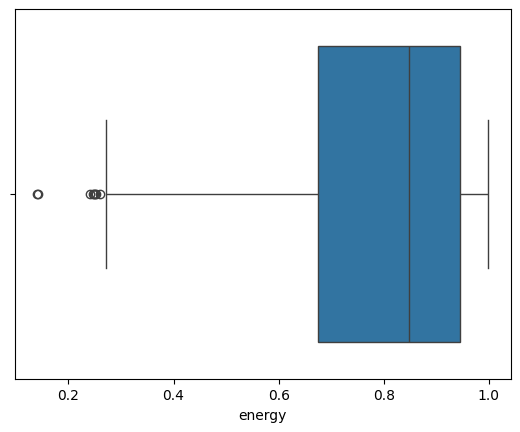

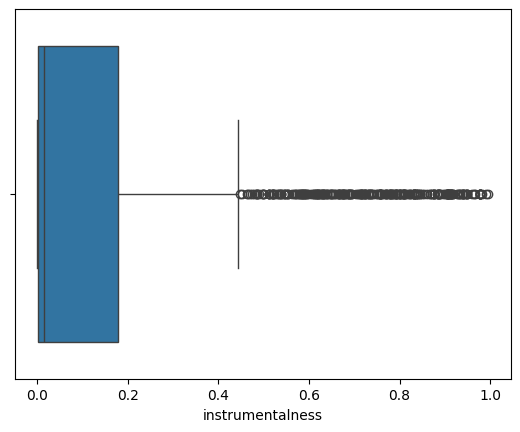

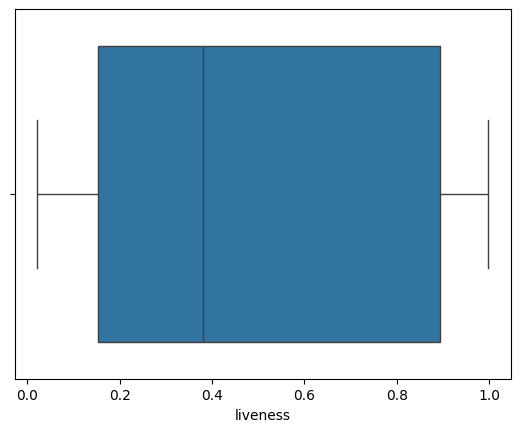

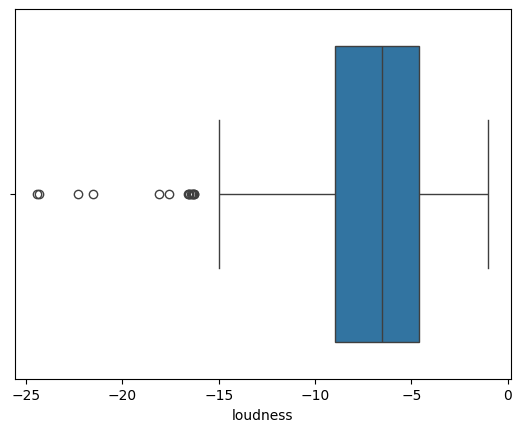

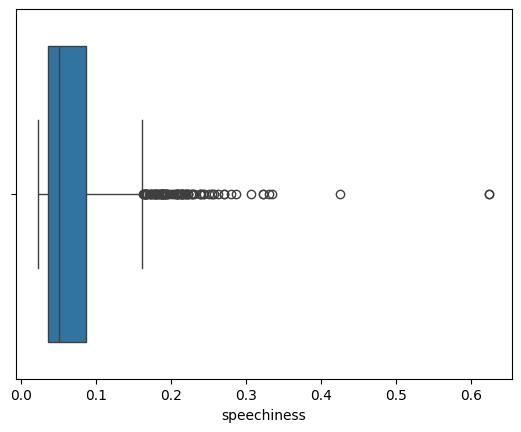

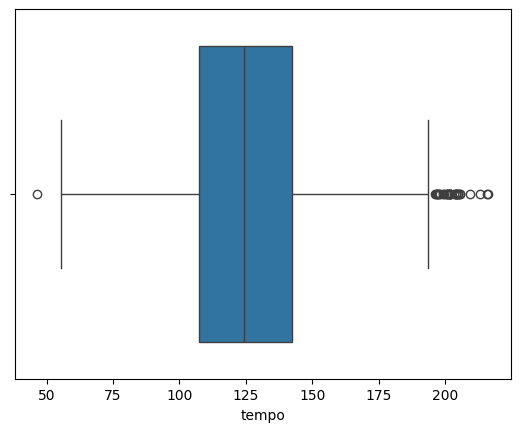

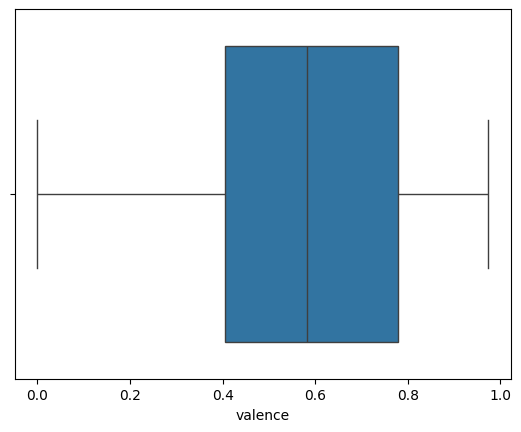

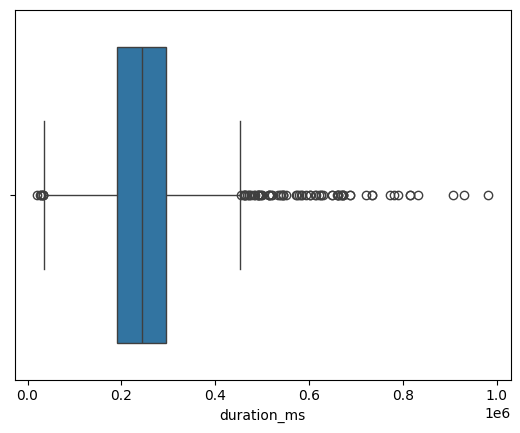

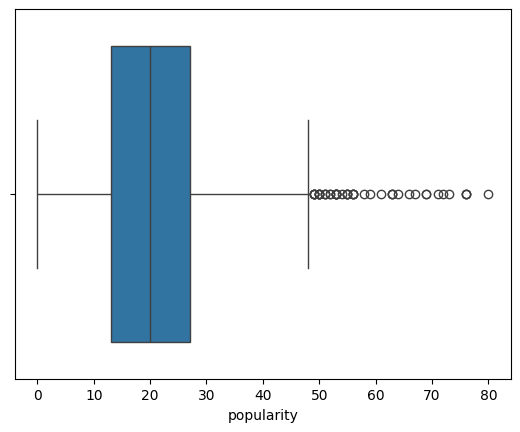

In [165]:
for i in new_albums.columns:
  sns.boxplot(x=new_albums[i])
  plt.show()

In [166]:
albums.groupby(['album', 'popularity']).size()

album                     popularity
12 X 5                    24            1
                          26            1
                          27            2
                          28            1
                          29            1
                                       ..
got LIVE if you want it!  14            2
                          16            2
                          17            2
                          18            1
                          21            1
Length: 874, dtype: int64

**Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.**

In [167]:
# find top two albums
dftop2=albums.groupby('album').size().sort_values(ascending=False)[:2]
dftop2

album
Voodoo Lounge Uncut (Live)    56
Honk (Deluxe)                 47
dtype: int64

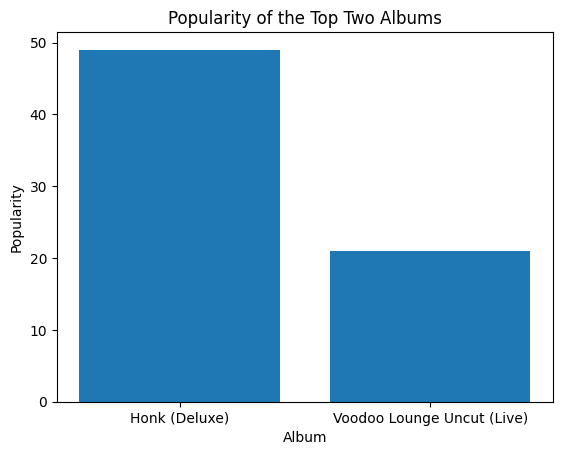

In [168]:
# Create a visualisation of the top two most popular albums

# Get the top two albums
top_two_albums = dftop2.index.tolist()

# Filter the data for the top two albums
top_two_albums_data = albums[albums['album'].isin(top_two_albums)]

# Create a bar chart of the popularity of the top two albums
plt.bar(top_two_albums_data['album'], top_two_albums_data['popularity'])
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Popularity of the Top Two Albums')
plt.show()


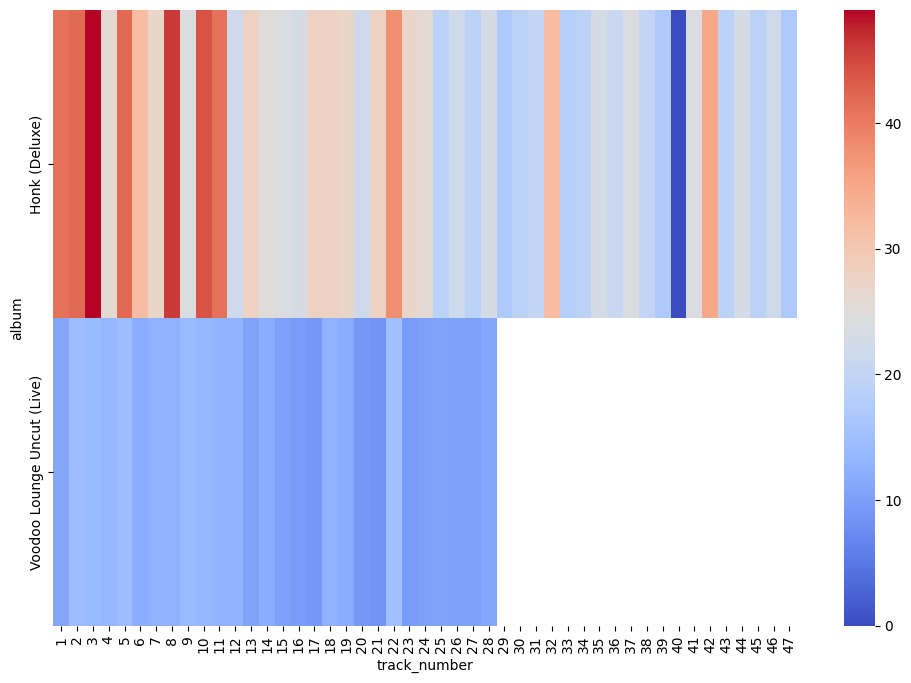

In [169]:
# Create a visualisation of the top two most popular albums
plt.figure(figsize=(12, 8))
sns.heatmap(albums[albums['album'].isin(dftop2.index)].pivot_table(values='popularity', index='album', columns='track_number'), cmap='coolwarm')
plt.show()

The top 2 albums for recommendation based on popularity are Voodoo Lounge Uncut (Live) and Honk (Deluxe)

**1. Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.**

**2. Discover how a song's popularity relates to various factors and how this has changed over time.**


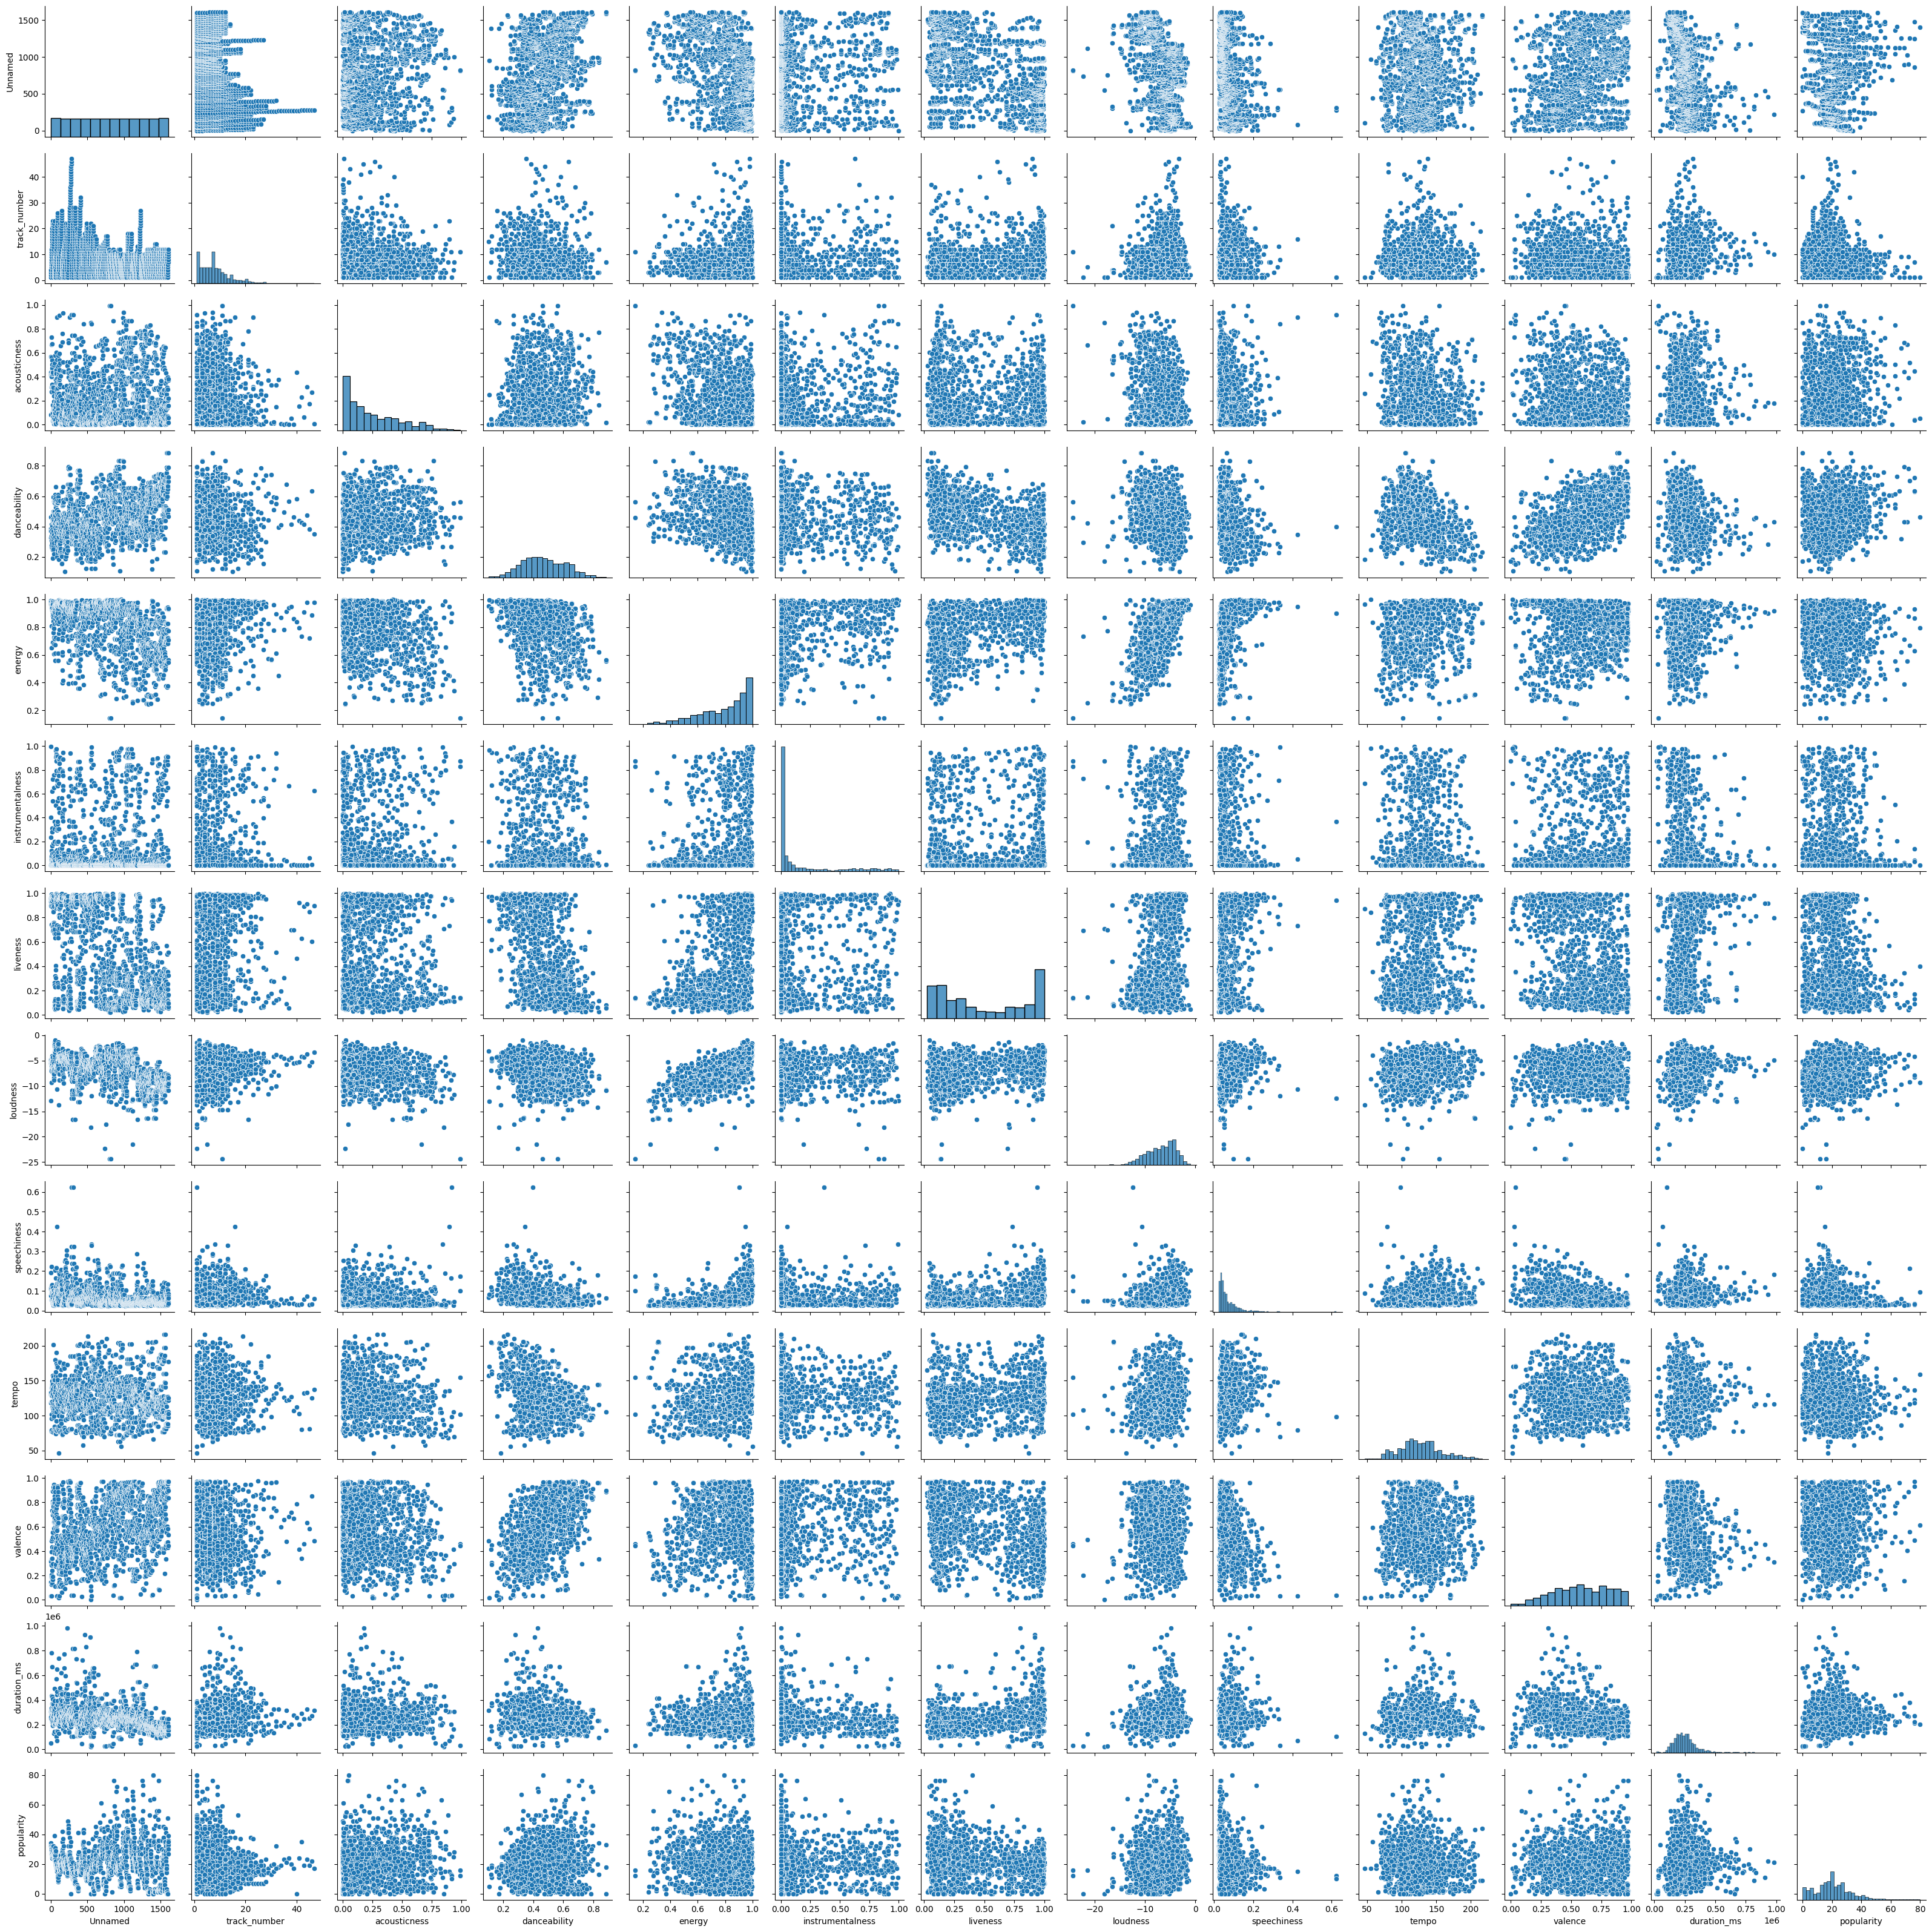

In [170]:
sns.pairplot(albums)

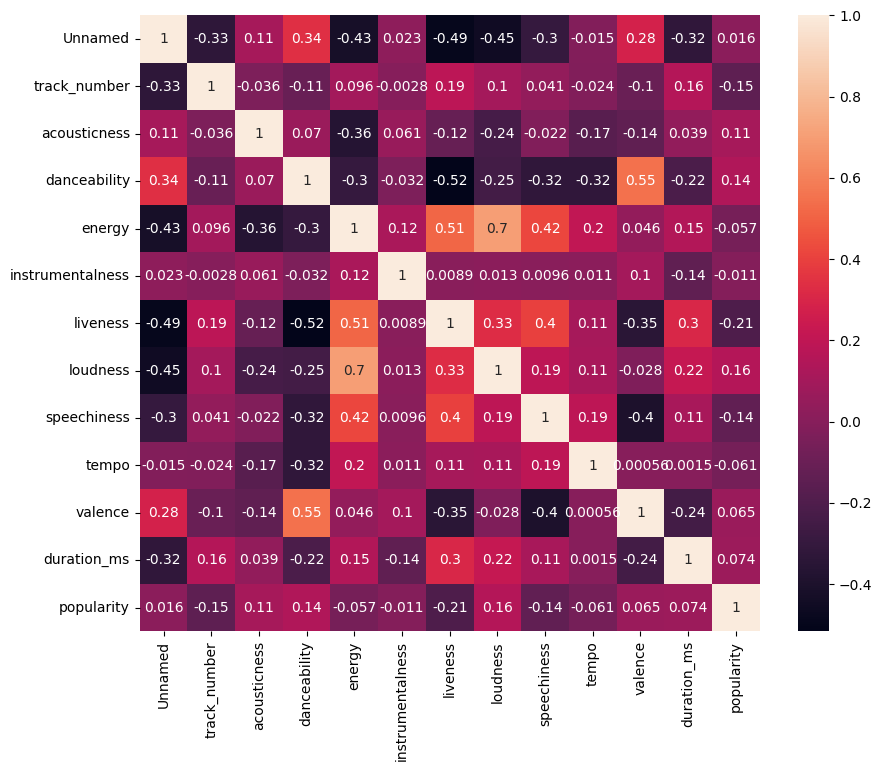

In [171]:
# Features vs Popularity of songs
plt.figure(figsize=(10,8))
sns.heatmap(albums.corr(),annot=True)
plt.show()

The popularity of a song is affected by (1) track_number, (2) acousticness, (3) danceability, (4) liveness, (5) loudness, and (6) speechiness.

The earlier a song appears on the album, the non-liveness of the music and a good mix of music and speech increase the popularity of a song. In addition, people also prefer acoustic music, music that inspires danceability, and loud music also appeals to certain music listeners.

**Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.**

Dimensionality Reduction Technique includes PCA and Random Forests. They help avoid overfitting, helps with data visualisation, and handle multi-collinarity.

Especially in this use case where there could be up to 6 factors influencing popularity of song, PCA could be used to identify the top 3 or 4 important features.

In [172]:
from sklearn.cluster import KMeans

In [198]:
X = albums.iloc[:, [16, 17]].values
X

array([[ 48640,     33],
       [253173,     34],
       [263160,     34],
       ...,
       [176080,     30],
       [121680,     27],
       [189186,     35]])

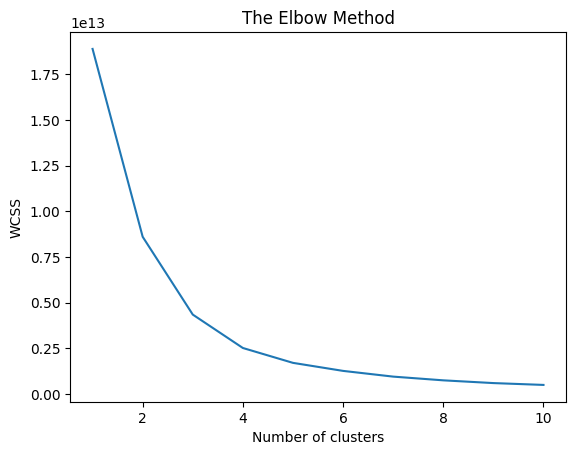

In [199]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [208]:
# Applying kmeans to the dataset / Creating the kmeans classifier
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)
y_kmeans

array([4, 1, 1, ..., 4, 4, 1], dtype=int32)

In [209]:
model.cluster_centers_

array([[17.49522293,  0.57484076],
       [39.02994012,  0.49700599],
       [ 5.23342939,  0.40057637],
       [58.20833333,  0.5       ],
       [27.03333333,  0.55952381]])

In [210]:
pred_df=pd.DataFrame(y_kmeans.tolist())

In [211]:
pred_df.value_counts()

0    628
4    420
2    347
1    167
3     48
dtype: int64

In [212]:
# append pred to data
albums['Cluster_number']=y_kmeans
albums

Unnamed                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC    10/6/2022   
1           1   Street Fighting Man - Live  Licked Live In NYC    10/6/2022   
2           2           Start Me Up - Live  Licked Live In NYC    10/6/2022   
3           3  If You Can't Rock Me - Live  Licked Live In NYC    10/6/2022   
4           4            Don’t Stop - Live  Licked Live In NYC    10/6/2022   
...       ...                          ...                 ...          ...   
1605     1605                        Carol  The Rolling Stones    16/4/1964   
1606     1606                      Tell Me  The Rolling Stones    16/4/1964   
1607     1607          Can I Get A Witness  The Rolling Stones    16/4/1964   
1608     1608   You Can Make It If You Try  The Rolling Stones    16/4/1964   
1609     1609              Walking The Dog  The Rolling Stones    16/4/1964   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  duration_ms  popularity  Cluster_number  
0      0.0302        48640          33               4  
1      0.3180       253173          34               1  
2      0.3130       263160          34               1  
3      0.1470       305880          32               4  
4      0.2060       305106          32               4  
...       ...          ...         ...             ...  
1605   0.9670       154080          39               1  
1606   0.4460       245266          36               1  
1607   0.8350       176080          30               4  
1608   0.5320       121680          27               4  
1609   0.9690       189186          35               1  

[1610 rows x 19 c

In [213]:
albums[albums['Cluster_number']==1]

Unnamed                                            name  \
1           1                      Street Fighting Man - Live   
2           2                              Start Me Up - Live   
46         46                   Start Me Up - Remastered 2021   
155       155       Doo Doo Doo Doo Doo (Heartbreaker) - 2020   
156       156                                    Angie - 2020   
...       ...                                             ...   
1574     1574                    Not Fade Away - Mono Version   
1599     1599  I Just Want To Make Love To You - Mono Version   
1605     1605                                           Carol   
1606     1606                                         Tell Me   
1609     1609                                 Walking The Dog   

                           album release_date  track_number  \
1             Licked Live In NYC    10/6/2022             2   
2             Licked Live In NYC    10/6/2022             3   
46     Tattoo You (Super Deluxe)   22/10/2021             1   
155     Goats Head Soup (Deluxe)     4/9/2020             4   
156     Goats Head Soup (Deluxe)     4/9/2020             5   
...                          ...          ...           ...   
1574  England’s Newest Hitmakers    30/5/1964             1   
1599          The Rolling Stones    16/4/1964             2   
1605          The Rolling Stones    16/4/1964             8   
1606          The Rolling Stones    16/4/1964             9   
1609          The Rolling Stones    16/4/1964            12   

                          id                                   uri  \
1     6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2     1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
46    0QT1jprS8mepNiTNvdVblv  spotify:track:0QT1jprS8mepNiTNvdVblv   
155   6EF89xJ4zsFB5tSX8pEHeX  spotify:track:6EF89xJ4zsFB5tSX8pEHeX   
156   1TJyjAa6rHkEZZpRS41rUp  spotify:track:1TJyjAa6rHkEZZpRS41rUp   
...                      ...                                   ...   
1574  0C7w4XnkIGu11MpNWbiTLB  spotify:track:0C7w4XnkIGu11MpNWbiTLB   
1599  7j96wehhMtN0fkVvFhD8Ix  spotify:track:7j96wehhMtN0fkVvFhD8Ix   
1605  08l7M5UpRnffGl0FyuRiQZ  spotify:track:08l7M5UpRnffGl0FyuRiQZ   
1606  3JZllQBsTM6WwoJdzFDLhx  spotify:track:3JZllQBsTM6WwoJdzFDLhx   
1609  43SkTJJ2xleDaeiE4TIM70  spotify:track:43SkTJJ2xleDaeiE4TIM70   

      acousticness  danceability  energy  instrumentalness  liveness  \
1          0.43700         0.326   0.965          0.233000    0.9610   
2          0.41600         0.386   0.969          0.400000    0.9560   
46         0.03020         0.555   0.956          0.367000    0.0753   
155        0.00794         0.461   0.726          0.427000    0.4730   
156        0.17100         0.441   0.488          0.000022    0.1120   
...            ...           ...     ...               ...       ...   
1574       0.00661         0.750   0.826          0.630000    0.1530   
1599       0.21900         0.657   0.825          0.845000    0.3540   
1605       0.15700         0.466   0.932          0.006170    0.3240   
1606       0.05760         0.509   0.706          0.000002    0.5160   
1609       0.38300         0.727   0.934          0.068500    0.0965   

      loudness  speechiness    tempo  valence  duration_ms  popularity  \
1       -4.803       0.0759  131.455    0.318       253173          34   
2       -4.936       0.1150  130.066    0.313       263160          34   
46      -2.147       0.0577  121.752    0.933       214173          39   
155     -5.138       0.0285  111.117    0.522       206760          35   
156     -6.404       0.0307  136.956    0.397       272173          42   
...        ...          ...      ...      ...          ...         ...   
1574    -9.992       0.0472  113.294    0.896       107720          41   
1599    -8.940       0.0980  126.817    0.582       137666          34   
1605    -9.214       0.0429  177.340    0.967       154080          39   
1606    -9.427       0

In [214]:
X = albums.iloc[:, [17, 18]].values
X

array([[33,  4],
       [34,  1],
       [34,  1],
       ...,
       [30,  4],
       [27,  4],
       [35,  1]])

Visualise the Clusters
1. Plot the clusters and their centroids on a scatter plot

2. Assign colour for each point

3. Consider title, x-axis and y-axis labels

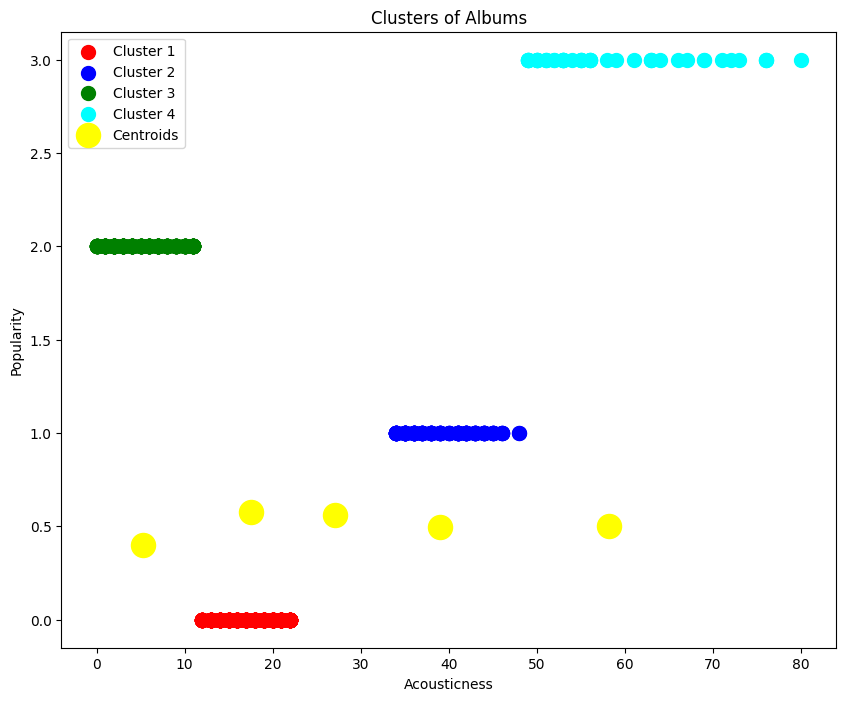

In [215]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Albums')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.legend()
plt.show()
